<a href="https://colab.research.google.com/github/elbasri/Arduino-ESP8266/blob/master/Copy_of_traffic_sign_image_classification_96_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Traffic Sign Image Classification 96% CNN**

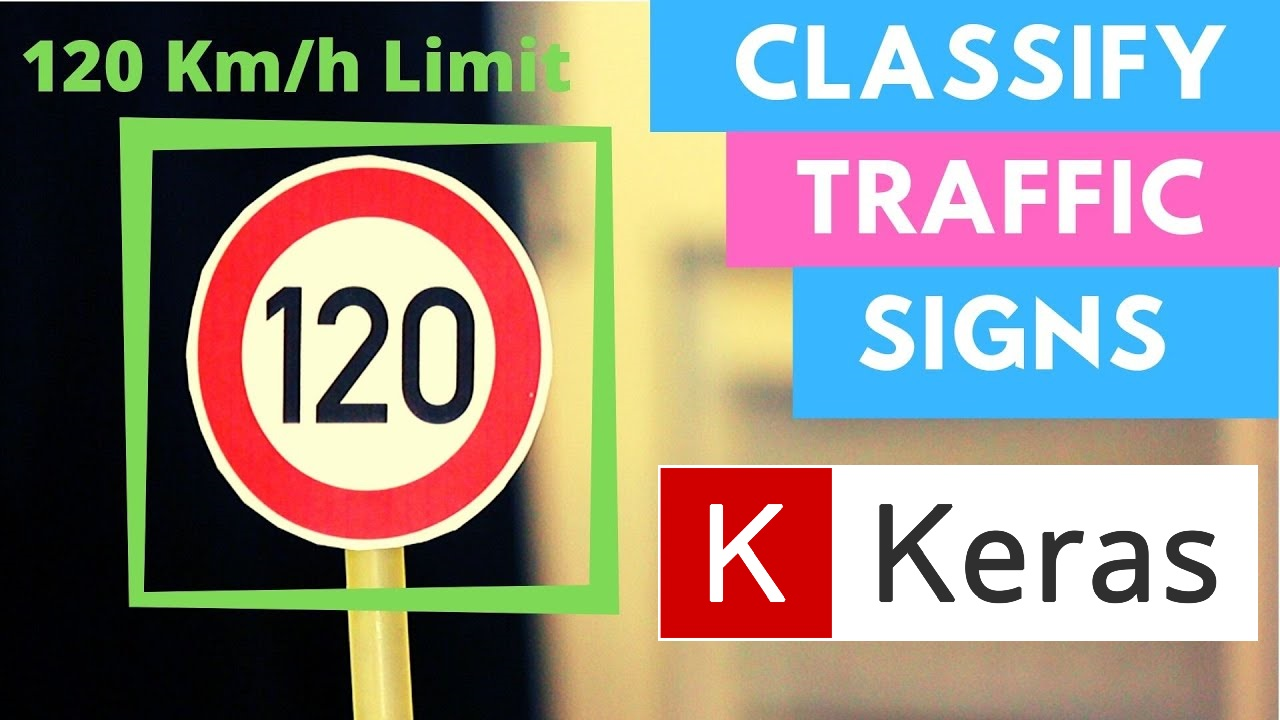

1. Download and Imports
2. Loading Dataset (Traffic Signs Images)
3. Data Splitting and conversion
4. Creating and Compiling the Model
5. Training the Model
6. Visualizing the performance of the Model during Training Phase
7. Loading Test Dataset and Evaluating the Model
8. Saving the Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Download and Imports

In [ ]:
# Fundamental classes
import numpy as np
import pandas as pd
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

# For ploting
import matplotlib.pyplot as plt

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# 2. Loading Dataset (Traffic Signs Images)

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign -p /content/drive/MyDrive/

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98% 597M/612M [00:05<00:00, 191MB/s]
100% 612M/612M [00:05<00:00, 113MB/s]


In [ ]:
!unzip /content/drive/MyDrive/gtsrb-german-traffic-sign.zip -d /content/drive/MyDrive/gtsrb-german-traffic-sign

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/gtsrb-german-traffic-sign/train/5/00005_00053_00010.png  
  inflating: /content/drive/MyDrive/gtsrb-german-traffic-sign/train/5/00005_00053_00011.png  
  inflating: /content/drive/MyDrive/gtsrb-german-traffic-sign/train/5/00005_00053_00012.png  
  inflating: /content/drive/MyDrive/gtsrb-german-traffic-sign/train/5/00005_00053_00013.png  
  inflating: /content/drive/MyDrive/gtsrb-german-traffic-sign/train/5/00005_00053_00014.png  
  inflating: /content/drive/MyDrive/gtsrb-german-traffic-sign/train/5/00005_00053_00015.png  
  inflating: /content/drive/MyDrive/gtsrb-german-traffic-sign/train/5/00005_00053_00016.png  
  inflating: /content/drive/MyDrive/gtsrb-german-traffic-sign/train/5/00005_00053_00017.png  
  inflating: /content/drive/MyDrive/gtsrb-german-traffic-sign/train/5/00005_00053_00018.png  
  inflating: /content/drive/MyDrive/gtsrb-german-traffic-sign/train/5/00005_00053_00019.png  
  inflati

In [ ]:
import os
from PIL import Image
import numpy as np

# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels
for i in range(classes):
    # Update this path to where the dataset is extracted in your Google Drive
    path = os.path.join('/content/drive/MyDrive/gtsrb-german-traffic-sign', 'Train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print(f"Error loading image: {a}")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)


# 3. Data Splitting and conversion

In [ ]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(32875, 30, 30, 3) (32875,)
(26300, 30, 30, 3) (6575, 30, 30, 3) (26300,) (6575,)


# 4. Creating and Compiling the Model

In [ ]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

# 5. Training the Model

In [ ]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 50
    history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/50
822/822 [==============================] - 107s 130ms/step - loss: 0.2542 - accuracy: 0.9271 - val_loss: 0.0616 - val_accuracy: 0.9817
Epoch 2/50
822/822 [==============================] - 101s 123ms/step - loss: 0.2439 - accuracy: 0.9287 - val_loss: 0.0733 - val_accuracy: 0.9813
Epoch 3/50
822/822 [==============================] - 103s 125ms/step - loss: 0.2395 - accuracy: 0.9326 - val_loss: 0.0653 - val_accuracy: 0.9792
Epoch 4/50
822/822 [==============================] - 108s 131ms/step - loss: 0.2660 - accuracy: 0.9267 - val_loss: 0.0622 - val_accuracy: 0.9816
Epoch 5/50
822/822 [==============================] - 107s 130ms/step - loss: 0.2456 - accuracy: 0.9294 - val_loss: 0.1286 - val_accuracy: 0.9582
Epoch 6/50
822/822 [==============================] - 102s 124ms/step - loss: 0.2662 - accuracy: 0.9292 - val_loss: 0.0776 - val_accuracy: 0.9784
Epoch 7/50
822/822 [==============================] - 106s 129ms/step - loss: 0.2435 - accuracy: 0.9344 - val_loss: 0.0750 -

# 6. Visualizing the performance of the Model during Training Phase

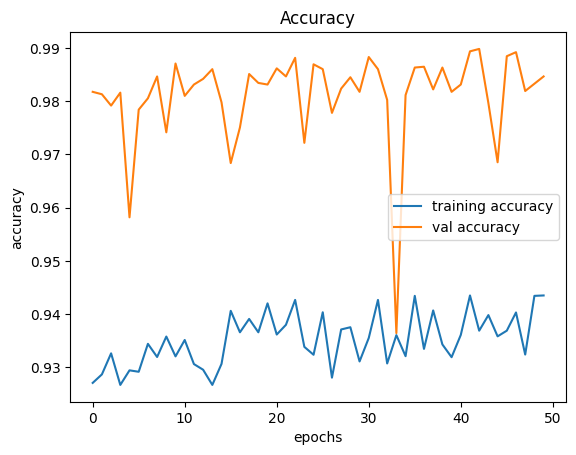

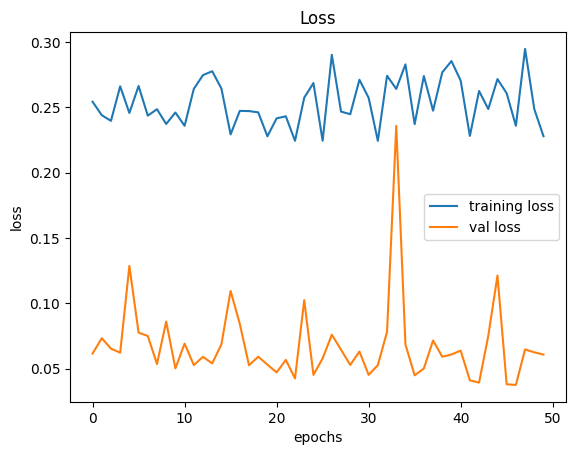

In [ ]:
# Plotting performance graphs
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# 7. Loading Test Dataset and Evaluating the Model

In [ ]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv('/content/drive/MyDrive/gtsrb-german-traffic-sign/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('/content/drive/MyDrive/gtsrb-german-traffic-sign/'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


KeyboardInterrupt: 

# 8. Savinng the Model

In [ ]:
# Saving the Model
model.save('newtraffic_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
labels

array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
# Create a TFLite converter object from the loaded TensorFlow model
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Set the optimization strategy (optional but recommended for efficiency)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('newtraffic_classifier.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on some input data.
input_shape = input_details[0]['shape']
# Ensure the input data matches the required shape and type
input_data = np.array(X_test[0].reshape(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run the interpreter
interpreter.invoke()

# Extract the output and print it
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
